<a href="https://colab.research.google.com/github/zaheera14/ARTIFICIAL-INTELLIGENCE/blob/main/AI%20PREPROCESSING%20%26%20TRAIN%20MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ---------------------------
# 0. Install dependencies
# ---------------------------
!pip install -q scikit-learn pandas numpy gradio imbalanced-learn openpyxl

In [ ]:
# ---------------------------
# 1. Imports
# ---------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import gradio as gr
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [ ]:
# ==========================================
# 2. Load your CSV
# ==========================================
df = pd.read_csv("/content/sample_data/utp_scholarship_survey_data.csv")

print(df.head())
print(df.columns)

   ID       Start time  Completion time                         Email  \
0   1  11/3/2025 14:55  11/1/2025 10:50    nabila_22664928@utp.edu.my   
1   2  11/5/2025 14:37  11/4/2025 11:49    aisyah_23371220@utp.edu.my   
2   3  11/6/2025 15:44   11/3/2025 9:32   keshwin_23043915@utp.edu.my   
3   4   11/4/2025 8:36  11/4/2025 17:47     ahmad_22560867@utp.edu.my   
4   5  11/3/2025 17:21  11/3/2025 20:34  letchumy_23825899@utp.edu.my   

             Name  Last modified time           Name2               Programme  \
0   NABILA HAMZAH                 NaN   Nabila Hamzah  Mechanical Engineering   
1   AISYAH SALLEH                 NaN   Aisyah Salleh     Information Systems   
2      KESHWIN NG                 NaN      Keshwin Ng    Computer Engineering   
3    AHMAD HAMZAH                 NaN    Ahmad Hamzah  Mechanical Engineering   
4  LETCHUMY CHONG                 NaN  Letchumy Chong     Information Systems   

  Year of Study Which UTP scholarship did you apply for?  \
0        Year 

In [ ]:
# ---------------------------
# 2. Load dataset
# ---------------------------
# Provided path (from your upload)
# Original file_path was: "C:/Users/User/Desktop/utp_scholarship_survey_data.csv"
# Please upload the file to your Colab session storage first.
file_path = "/content/sample_data/utp_scholarship_survey_data.csv"

df = pd.read_csv(file_path, header=0) # Assuming the actual column headers are on the first row (index 0)
print("Loaded file:", file_path)
print("Shape:", df.shape)
display(df.head())

Loaded file: /content/sample_data/utp_scholarship_survey_data.csv
Shape: (80, 18)


,ID,Start time,Completion time,Email,Name,Last modified time,Name2,Programme,Year of Study,Which UTP scholarship did you apply for?,Did you receive the scholarship?,Malaysian Muslim student?,"disciplinary record (Syariah, criminal, or UTP)?",CGPA when you applied,Total household income per month (RM),extracurricular or community service activities?,Straight As for SPM results,Do you currently hold any other scholarships or financial aid at the time of application
0,1,11/3/2025 14:55,11/1/2025 10:50,nabila_22664928@utp.edu.my,NABILA HAMZAH,NaN,Nabila Hamzah,Mechanical Engineering,Year 3,TAZU Scholarship,Yes,Yes,No,2.00,1123,Yes,No,Yes
1,2,11/5/2025 14:37,11/4/2025 11:49,aisyah_23371220@utp.edu.my,AISYAH SALLEH,NaN,Aisyah Salleh,Information Systems,Year 4,Yayasan UTP (YUTP) Full Scholarship,No,Yes,No,3.95,12847,No,Yes,No
2,3,11/6/2025 15:44,11/3/2025 9:32,keshwin_23043915@utp.edu.my,KESHWIN NG,NaN,Keshwin Ng,Computer Engineering,Year 2,Yayasan UTP (YUTP) Full Scholarship,No,No,No,3.84,10469,Yes,No,Yes
3,4,11/4/2025 8:36,11/4/2025 17:47,ahmad_22560867@utp.edu.my,AHMAD HAMZAH,NaN,Ahmad Hamzah,Mechanical Engineering,Year 1,Yayasan UTP (YUTP) Full Scholarship,No,Yes,Yes,3.52,1911,No,Yes,Yes
4,5,11/3/2025 17:21,11/3/2025 20:34,letchumy_23825899@utp.edu.my,LETCHUMY CHONG,NaN,Letchumy Chong,Information Systems,Year 2,Yayasan UTP (YUTP) Full Scholarship,No,No,Yes,3.72,13629,No,Yes,No


In [ ]:
# ==========================================
# 3. Clean Column Names (strip spaces)
# ==========================================
df.columns = df.columns.str.strip()

In [ ]:
# ==========================================
# 4. Create Eligibility Columns
# ==========================================

# TAZU rules
df["eligible_tazu"] = (
    (df["Malaysian Muslim student?"] == "Yes") &
    (df["disciplinary record (Syariah, criminal, or UTP)?"] == "No") &
    (df["CGPA when you applied"] >= 2.0) &
    (df["Total household income per month (RM)"] < 4000)
).astype(int)

# YUTP rules
df["eligible_yutp"] = (
    (df["Straight As for SPM results"] == "Yes") &
    (df["Total household income per month (RM)"] <= 4000) &
    (df["extracurricular or community service activities?"] == "Yes") &
    (df["Do you currently hold any other scholarships or financial aid at the time of application"] == "No")
).astype(int)

In [ ]:
# ==========================================
# 5. Encode Yes/No Columns
# ==========================================
yes_no_cols = [
    "Malaysian Muslim student?",
    "disciplinary record (Syariah, criminal, or UTP)?",
    "extracurricular or community service activities?",
    "Straight As for SPM results",
    "Do you currently hold any other scholarships or financial aid at the time of application"
]

le = LabelEncoder()

for col in yes_no_cols:
    df[col] = le.fit_transform(df[col].astype(str))



In [ ]:
# ==========================================================
# 6. Prepare Features & Labels for Both Scholarship Models
# ==========================================================

# model for TAZU
features_tazu = [
    "Malaysian Muslim student?",
    "disciplinary record (Syariah, criminal, or UTP)?",
    "CGPA when you applied",
    "Total household income per month (RM)"
]

X_tazu = df[features_tazu]
y_tazu = df["eligible_tazu"]

# model for YUTP
features_yutp = [
    "Straight As for SPM results",
    "Total household income per month (RM)",
    "extracurricular or community service activities?",
    "Do you currently hold any other scholarships or financial aid at the time of application"
]

X_yutp = df[features_yutp]
y_yutp = df["eligible_yutp"]

In [ ]:

#7. Train Models (Logistic Regression + Decision Tree)
# CREATE AI MODELS FOR EACH SCHOLARSHIP


# TAZU
log_tazu = LogisticRegression()
tree_tazu = DecisionTreeClassifier()

#LEARN FROM TAZU COLUMNS (.FIT MEANS LEARN FROM DATA)
log_tazu.fit(X_tazu, y_tazu)
tree_tazu.fit(X_tazu, y_tazu)

# YUTP
log_yutp = LogisticRegression()
tree_yutp = DecisionTreeClassifier()

log_yutp.fit(X_yutp, y_yutp)
tree_yutp.fit(X_yutp, y_yutp)

DecisionTreeClassifier()

In [ ]:
# ===============================
# 8. Gradio Prediction Function
# ===============================

def predict(scholarship, muslim, discipline, cgpa, income, spm, ecs, other_aid, model_type):

    if scholarship == "TAZU":
        X = pd.DataFrame([{
            "Malaysian Muslim student?": 1 if muslim == "Yes" else 0,
            "disciplinary record (Syariah, criminal, or UTP)?": 1 if discipline == "Yes" else 0,
            "CGPA when you applied": float(cgpa),
            "Total household income per month (RM)": float(income)
        }])

        model = log_tazu if model_type == "Logistic Regression" else tree_tazu

    elif scholarship == "YUTP":
        X = pd.DataFrame([{
            "Straight As for SPM results": 1 if spm == "Yes" else 0,
            "Total household income per month (RM)": float(income),
            "extracurricular or community service activities?": 1 if ecs == "Yes" else 0,
            "Do you currently hold any other scholarships or financial aid at the time of application": 1 if other_aid == "Yes" else 0
        }])

        model = log_yutp if model_type == "Logistic Regression" else tree_yutp

    pred = model.predict(X)[0]
    return "YES (Eligible)" if pred == 1 else "NO (Not Eligible)"

Accuracy: 1.0

TAZU Decision Tree Outcome:
              precision    recall  f1-score   support

Not Eligible       1.00      1.00      1.00        70
    Eligible       1.00      1.00      1.00        10

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
 [[70  0]
 [ 0 10]]


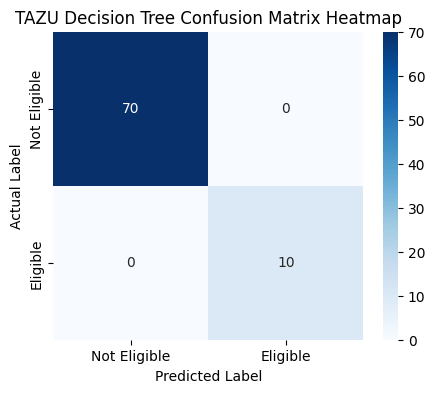

In [ ]:
# ===================================
# TAZU Decision Tree Model Evaluation
# ===================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = tree_tazu.predict(X_tazu)

accuracy = accuracy_score(y_tazu, y_pred)
print("Accuracy:", round(accuracy, 3))

print("\nTAZU Decision Tree Outcome:")
print(classification_report(y_tazu, y_pred, target_names=["Not Eligible","Eligible"]))

# --------------------------
# Confusion matrix
# --------------------------
cm = confusion_matrix(y_tazu, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Eligible","Eligible"],
    yticklabels=["Not Eligible","Eligible"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("TAZU Decision Tree Confusion Matrix Heatmap")
plt.show()



Accuracy: 0.95

TAZU Logistic Regression Outcome:
              precision    recall  f1-score   support

Not Eligible       0.95      1.00      0.97        70
    Eligible       1.00      0.60      0.75        10

    accuracy                           0.95        80
   macro avg       0.97      0.80      0.86        80
weighted avg       0.95      0.95      0.94        80

Confusion Matrix:
 [[70  0]
 [ 4  6]]


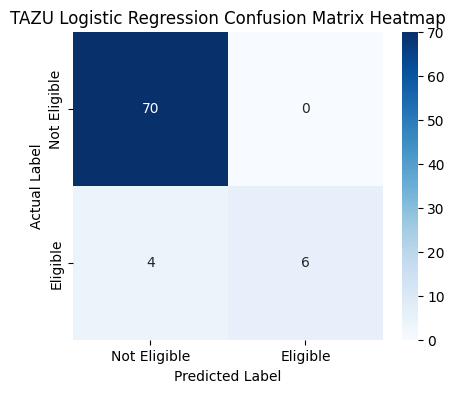

In [ ]:

# ============================
# TAZU Logistic Regression Model Evaluation
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_tazu.predict(X_tazu)

accuracy = accuracy_score(y_tazu, y_pred)
print("Accuracy:", round(accuracy, 3))

print("\nTAZU Logistic Regression Outcome:")
print(classification_report(y_tazu, y_pred, target_names=["Not Eligible","Eligible"]))

# ----------------------------
# Confusion matrix
# ----------------------------
cm = confusion_matrix(y_tazu, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Eligible","Eligible"],
    yticklabels=["Not Eligible","Eligible"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("TAZU Logistic Regression Confusion Matrix Heatmap")
plt.show()

Accuracy: 1.0

YUTP Decision Tree Outcome:
              precision    recall  f1-score   support

Not Eligible       1.00      1.00      1.00        62
    Eligible       1.00      1.00      1.00        18

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
 [[62  0]
 [ 0 18]]


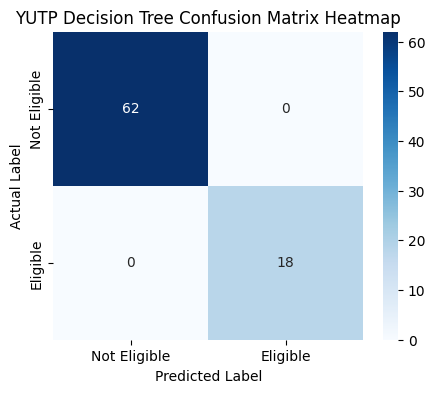

In [ ]:
# ============================
# YUTP Decision Tree Model Evaluation
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = tree_yutp.predict(X_yutp)

accuracy = accuracy_score(y_yutp, y_pred)
print("Accuracy:", round(accuracy, 3))

print("\nYUTP Decision Tree Outcome:")
print(classification_report(y_yutp, y_pred, target_names=["Not Eligible","Eligible"]))

# ----------------------------
# Confusion matrix
# ----------------------------
cm = confusion_matrix(y_yutp, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Eligible","Eligible"],
    yticklabels=["Not Eligible","Eligible"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("YUTP Decision Tree Confusion Matrix Heatmap")
plt.show()

Accuracy: 0.988

YUTP Logistic Regression Outcome:
              precision    recall  f1-score   support

Not Eligible       1.00      0.98      0.99        62
    Eligible       0.95      1.00      0.97        18

    accuracy                           0.99        80
   macro avg       0.97      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix:
 [[61  1]
 [ 0 18]]


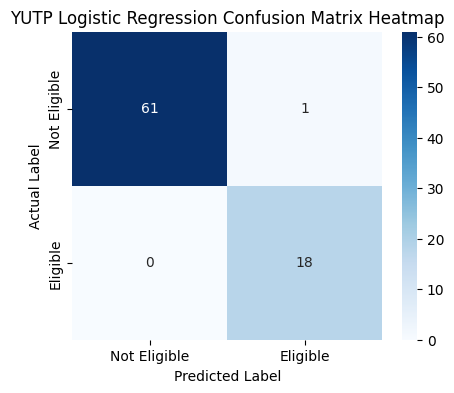

In [ ]:
# ============================
# YUTP Logistic Regression Model Evaluation
# ============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_yutp.predict(X_yutp)

accuracy = accuracy_score(y_yutp, y_pred)
print("Accuracy:", round(accuracy, 3))

print("\nYUTP Logistic Regression Outcome:")
print(classification_report(y_yutp, y_pred, target_names=["Not Eligible","Eligible"]))

# ----------------------------
# Confusion matrix
# ----------------------------
cm = confusion_matrix(y_yutp, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Eligible","Eligible"],
    yticklabels=["Not Eligible","Eligible"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("YUTP Logistic Regression Confusion Matrix Heatmap")
plt.show()

In [ ]:
# ================================
# CUSTOM CSS
# ================================
custom_css = """
h1, h2, h3, label, input, button, textarea, body {
    font-family: 'Inter', 'Segoe UI', sans-serif !important;
}
.gradio-container {
    font-size: 16px;
}
"""

# ================================
# UI
# ================================
dropdown_yesno = ["Yes", "No"]

with gr.Blocks(
    theme=gr.themes.Soft(primary_hue="pink"),
    css=custom_css
) as demo:

    gr.Markdown(
        """
        <h1 style="text-align:center; color:#d63384;">
            🎓 UTP Scholarship Eligibility Checker
        </h1>
        <p style="text-align:center; font-size:17px;">
            Enter your details below to check if you're eligible for TAZU or YUTP scholarships.
        </p>
        """
    )

    # ------------------------------
    # REQUIREMENTS SECTION
    # ------------------------------
    with gr.Group():
        gr.Markdown("<h2 style='color:#d63384;'>📌 Applicant Information</h2>")

        scholarship = gr.Dropdown(["TAZU", "YUTP"], label="Select Scholarship")

        with gr.Row():
            muslim = gr.Dropdown(dropdown_yesno, label="Malaysian Muslim student?")
            discipline = gr.Dropdown(dropdown_yesno, label="Disciplinary record?")
            cgpa = gr.Number(label="CGPA when you applied")

        income = gr.Number(label="Total household income per month (RM)")

        with gr.Row():
            spm = gr.Dropdown(dropdown_yesno, label="Straight As for SPM results")
            ecs = gr.Dropdown(dropdown_yesno, label="Extracurricular/community service?")
            other_aid = gr.Dropdown(dropdown_yesno, label="Holding other financial aid?")

        model_type = gr.Dropdown(
            ["Logistic Regression", "Decision Tree"],
            label="Choose AI Model"
        )

        submit_btn = gr.Button("Check Eligibility", variant="primary")

    # ------------------------------
    # RESULTS SECTION
    # ------------------------------
    with gr.Group():
        gr.Markdown("<h2 style='color:#d63384;'>📄 Eligibility Results</h2>")

        result = gr.Textbox(label="Eligibility Result", lines=1, interactive=False)
        explanation = gr.Textbox(label="Explanation", lines=7, interactive=False)

    submit_btn.click(
        fn=predict,
        inputs=[scholarship, muslim, discipline, cgpa, income, spm, ecs, other_aid, model_type],
        outputs=[result, explanation]
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f4feed1f16f77ef6e9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# ==========================================
# 9. Gradio UI
# ==========================================
dropdown_yesno = ["Yes", "No"]

ui = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(["TAZU", "YUTP"], label="Select Scholarship"),
        gr.Dropdown(dropdown_yesno, label="Malaysian Muslim student? (TAZU only)"),
        gr.Dropdown(dropdown_yesno, label="Disciplinary record? (TAZU only)"),
        gr.Number(label="CGPA when you applied (TAZU only)"),
        gr.Number(label="Total household income per month (RM)"),
        gr.Dropdown(dropdown_yesno, label="Straight As for SPM results (YUTP only)"),
        gr.Dropdown(dropdown_yesno, label="Extracurricular/community service? (YUTP only)"),
        gr.Dropdown(dropdown_yesno, label="Holding other financial aid? (YUTP only)"),
        gr.Dropdown(["Logistic Regression", "Decision Tree"], label="Choose Model")
    ],
    outputs="text",
    title="UTP Scholarship Eligibility Predictor"
)

ui.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://75ff35e1425899b7d9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
